# Continuous Control with DDPG

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the second project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893) program.

### 1. Start the Environment

We begin by importing the necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Reacher.app"`
- **Windows** (x86): `"path/to/Reacher_Windows_x86/Reacher.exe"`
- **Windows** (x86_64): `"path/to/Reacher_Windows_x86_64/Reacher.exe"`
- **Linux** (x86): `"path/to/Reacher_Linux/Reacher.x86"`
- **Linux** (x86_64): `"path/to/Reacher_Linux/Reacher.x86_64"`
- **Linux** (x86, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86"`
- **Linux** (x86_64, headless): `"path/to/Reacher_Linux_NoVis/Reacher.x86_64"`

For instance, if you are using a Mac, then you downloaded `Reacher.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Reacher.app")
```

In [2]:
# env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux/Reacher.x86_64')
# env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_v1/Reacher.x86_64')
# env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_OneAgent/Reacher_Linux/Reacher.x86_64')
# env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_NoVis_OneAgent/Reacher_Linux_NoVis/Reacher.x86_64')
# env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_NoVis/Reacher.x86_64')
env = UnityEnvironment(file_name='/home/arasdar/unity-envs/Reacher_Linux_NoVis_MultiAgents/Reacher_Linux_NoVis/Reacher.x86_64')

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		goal_size -> 5.0
		goal_speed -> 1.0
Unity brain name: ReacherBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 33
        Number of stacked Vector Observation: 1
        Vector Action space type: continuous
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

In this environment, a double-jointed arm can move to target locations. A reward of `+0.1` is provided for each step that the agent's hand is in the goal location. Thus, the goal of your agent is to maintain its position at the target location for as many time steps as possible.

The observation space consists of `33` variables corresponding to position, rotation, velocity, and angular velocities of the arm.  Each action is a vector with four numbers, corresponding to torque applicable to two joints.  Every entry in the action vector must be a number between `-1` and `1`.

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
# print('The state for the first agent looks like:', states[0])

Number of agents: 20
Size of each action: 4
There are 20 agents. Each observes a state with length: 33


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# while True:
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
# # Testing the train mode
# env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
# state = env_info.vector_observations[0]                  # get the current state (for each agent)
# #scores = np.zeros(num_agents)                          # initialize the score (for each agent)
# num_steps = 0
# while True:
#     num_steps += 1
#     action = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     #print(action)
#     action = np.clip(action, -1, 1)                  # all actions between -1 and 1
#     #print(action)
#     env_info = env.step(action)[brain_name]           # send all actions to tne environment
#     next_state = env_info.vector_observations[0]         # get next state (for each agent)
#     reward = env_info.rewards[0]                         # get reward (for each agent)
#     done = env_info.local_done[0]                        # see if episode finished
#     #scores += env_info.rewards                         # update the score (for each agent)
#     state = next_state                               # roll over states to next time step
#     if done is True:                                  # exit loop if episode finished
#         #print(action.shape, reward)
#         #print(done)
#         break
# print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))
# num_steps

## Option 1: Solve the First Version
The task is episodic, and in order to solve the environment, your agent must get an average score of +30 over 100 consecutive episodes.

In [8]:
import tensorflow as tf
print('TensorFlow Version: {}'.format(tf.__version__))
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: 


In [9]:
def model_input(state_size, action_size):
    #states = tf.placeholder(tf.float32, [None, *state_size], name='states')
    states = tf.placeholder(tf.float64, [None, state_size], name='states')
    actions = tf.placeholder(tf.float64, [None, action_size], name='actions')
    targetQs = tf.placeholder(tf.float64, [None], name='targetQs')
    isTraining = tf.placeholder(tf.bool, [], name='isTraining')
    return states, actions, targetQs, isTraining

In [10]:
def actor(states, action_size, hidden_size, reuse=False, alpha=0.01, training=False):
    with tf.variable_scope('actor', reuse=reuse):
        # First fully connected layer
        #h1 = tf.layers.dense(inputs=states, units=hidden_size) # no Xavier
        h1 = tf.contrib.layers.fully_connected(inputs=states, num_outputs=hidden_size, activation_fn=None)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        #h2 = tf.layers.dense(inputs=nl1, units=hidden_size) # no Xavier
        h2 = tf.contrib.layers.fully_connected(inputs=nl1, num_outputs=hidden_size, activation_fn=None)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        #logits = tf.layers.dense(inputs=nl2, units=action_size)
        logits = tf.contrib.layers.fully_connected(inputs=nl2, num_outputs=action_size, activation_fn=None)
        pred = tf.tanh(logits) # [-1, +1]
        return logits

In [11]:
def actor_target(states, action_size, hidden_size, reuse=False, alpha=0.01, training=False):
    with tf.variable_scope('actor_target', reuse=reuse):
        # First fully connected layer
        #h1 = tf.layers.dense(inputs=states, units=hidden_size) # no Xavier
        h1 = tf.contrib.layers.fully_connected(inputs=states, num_outputs=hidden_size, activation_fn=None)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        #h2 = tf.layers.dense(inputs=nl1, units=hidden_size) # no Xavier
        h2 = tf.contrib.layers.fully_connected(inputs=nl1, num_outputs=hidden_size, activation_fn=None)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
        
        # Output layer
        #logits = tf.layers.dense(inputs=nl2, units=action_size)
        logits = tf.contrib.layers.fully_connected(inputs=nl2, num_outputs=action_size, activation_fn=None)
        pred = tf.tanh(logits) # [-1, +1]
        return logits

In [12]:
def critic(states, actions, action_size, hidden_size, reuse=False, alpha=0.01, training=False):
    with tf.variable_scope('critic', reuse=reuse):
        # First fully connected layer
        #h1 = tf.layers.dense(inputs=states, units=action_size)
        h1 = tf.contrib.layers.fully_connected(inputs=states, num_outputs=hidden_size, activation_fn=None)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        nl1_fused = tf.concat(axis=1, values=[nl1, actions])
        #h2 = tf.layers.dense(inputs=nl1_fused, units=hidden_size)
        h2 = tf.contrib.layers.fully_connected(inputs=nl1_fused, num_outputs=hidden_size, activation_fn=None)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
                
        # Third layer
        #logits = tf.layers.dense(inputs=nl2, units=1)
        h3 = tf.contrib.layers.fully_connected(inputs=nl2, num_outputs=hidden_size, activation_fn=None)
        bn3 = tf.layers.batch_normalization(h3, training=training)        
        nl3 = tf.maximum(alpha * bn3, bn3)
        
        # Output layer
        logits = tf.contrib.layers.fully_connected(inputs=nl3, num_outputs=1, activation_fn=None)
        return logits

In [13]:
def critic_target(states, actions, action_size, hidden_size, reuse=False, alpha=0.01, training=False):
    with tf.variable_scope('critic_target', reuse=reuse):
        # First fully connected layer
        #h1 = tf.layers.dense(inputs=states, units=action_size)
        h1 = tf.contrib.layers.fully_connected(inputs=states, num_outputs=hidden_size, activation_fn=None)
        bn1 = tf.layers.batch_normalization(h1, training=training)        
        nl1 = tf.maximum(alpha * bn1, bn1)
        
        # Second fully connected layer
        nl1_fused = tf.concat(axis=1, values=[nl1, actions])
        #h2 = tf.layers.dense(inputs=nl1_fused, units=hidden_size)
        h2 = tf.contrib.layers.fully_connected(inputs=nl1_fused, num_outputs=hidden_size, activation_fn=None)
        bn2 = tf.layers.batch_normalization(h2, training=training)        
        nl2 = tf.maximum(alpha * bn2, bn2)
                
        # Third layer
        #logits = tf.layers.dense(inputs=nl2, units=1)
        h3 = tf.contrib.layers.fully_connected(inputs=nl2, num_outputs=hidden_size, activation_fn=None)
        bn3 = tf.layers.batch_normalization(h3, training=training)        
        nl3 = tf.maximum(alpha * bn3, bn3)
        
        # Output layer
        logits = tf.contrib.layers.fully_connected(inputs=nl3, num_outputs=1, activation_fn=None)
        return logits

In [14]:
def model_loss(actions, states, targetQs, action_size, hidden_size, isTraining):
    #######################################################################
    actions_target = actor_target(states=states, hidden_size=hidden_size, action_size=action_size, 
                                  training=isTraining)
    gQlogits_target = critic_target(states=states, actions=actions_target, hidden_size=hidden_size, 
                                    action_size=action_size, training=isTraining)
    ###################################################################
    actions_logits = actor(states=states, hidden_size=hidden_size, action_size=action_size, 
                           training=isTraining)
    gQlogits = critic(states=states, actions=actions_logits, hidden_size=hidden_size, action_size=action_size,
                      training=isTraining)
    ###########################################################################
    Qlogits = critic(states=states, actions=actions, hidden_size=hidden_size, action_size=action_size, 
                     training=isTraining, reuse=True)
    ###########################################################################
    Qs = tf.reshape(Qlogits, shape=[-1])
    gQs = tf.reshape(gQlogits, shape=[-1])
    dloss = tf.reduce_mean(tf.square(Qs - targetQs))
    gloss = -tf.reduce_mean(gQs)
    return actions_target, gQlogits_target, gloss, dloss

In [15]:
def model_opt(gloss, dloss, g_learning_rate, d_learning_rate, gamma):
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('actor')]
    d_vars = [var for var in t_vars if var.name.startswith('critic')]
    g_vars_tgt = [var for var in t_vars if var.name.startswith('actor_target')]
    d_vars_tgt = [var for var in t_vars if var.name.startswith('critic_target')]

    #     # # Optimize RNN
    #     #grads, _ = tf.clip_by_global_norm(t_list=tf.gradients(loss, g_vars), clip_norm=5) # usually around 1-5
    #     g_grads = tf.gradients(gloss, g_vars)
    #     d_grads = tf.gradients(dloss, d_vars)
    #     g_opt = tf.train.AdamOptimizer(g_learning_rate).apply_gradients(grads_and_vars=zip(g_grads, g_vars))
    #     d_opt = tf.train.AdamOptimizer(d_learning_rate).apply_gradients(grads_and_vars=zip(d_grads, d_vars))
    
    # Optimize
    with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): # Required for batchnorm (BN)
        g_opt = tf.train.AdamOptimizer(g_learning_rate).minimize(gloss, var_list=g_vars)
        d_opt = tf.train.AdamOptimizer(d_learning_rate).minimize(dloss, var_list=d_vars)
    
    # Soft update/ NOT hard update
    # θ_target = τ*θ + (1 - τ)*θ_target
    # θ_target = (1-gamma)*θ + gamma*θ_target
    g_opt_tgt = [g_vars_tgt[i].assign((g_vars_tgt[i]*gamma) + (g_vars[i]*(1 - gamma)))
                 for i in range(len(g_vars_tgt))]
    d_opt_tgt = [d_vars_tgt[i].assign((d_vars_tgt[i]*gamma) + (d_vars[i]*(1 - gamma))) 
                 for i in range(len(d_vars_tgt))]

    return g_opt, d_opt, g_opt_tgt, d_opt_tgt

In [16]:
class Model:
    def __init__(self, state_size, action_size, hidden_size, g_learning_rate, d_learning_rate, gamma):
        
        # Data of the Model: make the data available inside the framework
        self.states, self.actions, self.targetQs, self.isTraining = model_input(state_size=state_size, 
                                                                                action_size=action_size)

        # Create the Model: calculating the loss and forwad pass
        self.actions_target, self.gQlogits_target, self.gloss, self.dloss = model_loss(
            action_size=action_size, hidden_size=hidden_size, # model init
            states=self.states, actions=self.actions, targetQs=self.targetQs, isTraining=self.isTraining)
        
        # Update the model: backward pass and backprop
        self.g_opt, self.d_opt, self.g_opt_tgt, self.d_opt_tgt = model_opt(gloss=self.gloss, dloss=self.dloss,
                                                                           g_learning_rate=g_learning_rate, 
                                                                           d_learning_rate=d_learning_rate, 
                                                                           gamma=gamma)

In [17]:
from collections import deque
class Memory():
    def __init__(self, max_size = 1000):
        self.buffer = deque(maxlen=max_size)
    def sample(self, batch_size):
        idx = np.random.choice(np.arange(len(self.buffer)), 
                               size=batch_size, 
                               replace=False)
        return [self.buffer[ii] for ii in idx]

In [18]:
# reset the environment
env_info.vector_observations.shape, env_info.previous_vector_actions.shape, \
brain.vector_action_space_size, brain.number_visual_observations, \
brain.vector_action_space_size, brain.vector_observation_space_size

((20, 33), (20, 4), 4, 0, 4, 33)

In [19]:
# Network parameters
state_size = 33
action_size = 4
hidden_size = 400             # number of units in each Q-network hidden layer
g_learning_rate = 1e-4         # Q-network learning rate
d_learning_rate = 1e-4         # Q-network learning rate

# Memory parameters
memory_size = int(1e6)            # memory capacity
batch_size = 1024             # experience mini-batch size
gamma=0.99

In [20]:
# Reset/init the graph/session
graph = tf.reset_default_graph()

# Init the model
model = Model(action_size=action_size, state_size=state_size, hidden_size=hidden_size, gamma=gamma,
              g_learning_rate=g_learning_rate, d_learning_rate=d_learning_rate)

# Init the memory
memory = Memory(max_size=memory_size)

In [21]:
# env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)

# for _ in range(memory_size):
#     actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
#     actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished

#     for state, action, next_state, reward, done in zip(states, actions, next_states, rewards, dones):
#         #agent.step(state, action, reward, next_state, done) # send actions to the agent
#         memory.buffer.append([state, action, next_state, reward, done])
        
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
    
#     if np.any(dones):                                  # exit loop if episode finished
#         print('Average scores: {}'.format(np.mean(scores)))
#         env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
#         states = env_info.vector_observations                  # get the current state (for each agent)
#         scores = np.zeros(num_agents)                          # initialize the score (for each agent)

In [22]:
# env_info = env.reset(train_mode=True)[brain_name] # reset the environment
# states = env_info.vector_observations   # get the state
# for _ in range(memory_size):
#     action = np.random.randint(action_size)        # select an action
#     env_info = env.step(action)[brain_name]        # send the action to the environment
#     next_state = env_info.vector_observations[0]   # get the next state
#     reward = env_info.rewards[0]                   # get the reward
#     done = env_info.local_done[0]                  # see if episode has finished
#     memory.buffer.append([state, action, next_state, reward, float(done)])
#     state = next_state
#     if done:                                       # exit loop if episode finished
#         env_info = env.reset(train_mode=True)[brain_name] # reset the environment
#         state = env_info.vector_observations[0]   # get the state
#         break

In [33]:
# Save/load the model and save for plotting
saver = tf.train.Saver()
episode_rewards_list, rewards_list = [], []
gloss_list, dloss_list = [], []

# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    episode_reward = deque(maxlen=100) # 100 episodes for running average/running mean/window
    n_episodes=2000 
    max_t=1000 
    #     print_every=10, 
    learn_every=20 
    num_learn=20
    goal_score=30

    # Training episodes/epochs
    for ep in range(n_episodes):
        gloss_batch, dloss_batch = [], []
        
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations                 # get the current state (for each agent)
        #print(states.shape)
        scores = np.zeros(num_agents)                          # initialize the score (for each agent)
        
        # Training steps/batches
        for t in range(max_t):
            actions_target = sess.run(model.actions_target, feed_dict={model.states: states, 
                                                                       model.isTraining: False})
            
            noise = np.random.normal(loc=0, scale=0.01, size=[num_agents, action_size])
            actions_target += noise
            actions = np.clip(actions_target, -1, 1) # [-1, +1]
            
            #print(actions.shape)
            #next_state, reward, done, _ = env.step(action)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                        # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            
            for state, action, next_state, reward, done in zip(states, actions, next_states, rewards, dones):
                #agent.step(state, action, reward, next_state, done) # send actions to the agent
                memory.buffer.append([state, action, next_state, reward, done])

            scores += env_info.rewards                         # update the score (for each agent)
            states = next_states                               # roll over states to next time step
            
            # total reward
            total_reward = np.mean(scores)
            
            # Training
            if len(memory.buffer) >= batch_size:
                if t%learn_every == 0:
                    #for each in range(num_learn):
                    #agent.start_learn()
                    #experiences = self.memory.sample()
                    batch = memory.sample(batch_size)
                    states_ = np.array([each[0] for each in batch])
                    actions_ = np.array([each[1] for each in batch])
                    next_states_ = np.array([each[2] for each in batch])
                    rewards_ = np.array([each[3] for each in batch])
                    dones_ = np.array([each[4] for each in batch])

                    #self.learn(experiences, GAMMA)
                    # TargetQs
                    nextQlogits = sess.run(model.gQlogits_target, feed_dict = {model.states: next_states_, 
                                                                               model.isTraining: False})
                    nextQs = nextQlogits.reshape(-1)
                    targetQs = rewards_ + (gamma * nextQs * (1-dones_))

                    feed_dict = {model.states: states_, model.actions: actions_, model.targetQs: targetQs,
                                 model.isTraining: True}
                    dloss, _= sess.run([model.dloss, model.d_opt], feed_dict)
                    dloss_batch.append(dloss)

                    # Learn actor only once compared to critic
                    #if each == num_learn-1:
                    gloss, _= sess.run([model.gloss, model.g_opt], feed_dict)
                    gloss_batch.append(gloss)
                    
                    # Update the target networks
                    sess.run([model.d_opt_tgt, model.g_opt_tgt])
            
            # End of episode
            if np.any(dones) == 1:
                break
                
        # Print out
        episode_reward.append(total_reward)
        print('Episode:{}'.format(ep),
              'meanR:{:.4f}'.format(np.mean(episode_reward)),
              'R:{:.4f}'.format(total_reward),
              'gloss:{:.4f}'.format(np.mean(gloss_batch)),
              'dloss:{:.4f}'.format(np.mean(dloss_batch)))
        
        # Ploting out
        episode_rewards_list.append([ep, np.mean(episode_reward)])
        rewards_list.append([ep, total_reward])
        gloss_list.append([ep, np.mean(gloss_batch)])
        dloss_list.append([ep, np.mean(dloss_batch)])
        
        # Break episode/epoch loop
        ## Option 1: Solve the First Version
        #The task is episodic, and in order to solve the environment, 
        #your agent must get an average score of +30 over 100 consecutive episodes.
        if np.mean(episode_reward) >= goal_score:
            break
            
    # At the end of all training episodes/epochs
    saver.save(sess, 'checkpoints/model.ckpt')

Episode:0 meanR:0.8675 R:0.8675 gloss:0.1228 dloss:0.2060
Episode:1 meanR:0.8927 R:0.9180 gloss:0.1211 dloss:0.1007
Episode:2 meanR:0.9580 R:1.0885 gloss:0.1422 dloss:0.1013
Episode:3 meanR:0.9221 R:0.8145 gloss:0.1074 dloss:0.1034
Episode:4 meanR:0.9217 R:0.9200 gloss:0.0732 dloss:0.0995
Episode:5 meanR:0.9254 R:0.9440 gloss:0.0408 dloss:0.0932
Episode:6 meanR:0.9345 R:0.9890 gloss:0.0098 dloss:0.0889
Episode:7 meanR:0.9471 R:1.0355 gloss:-0.0216 dloss:0.0855
Episode:8 meanR:0.9527 R:0.9970 gloss:-0.0362 dloss:0.0813
Episode:9 meanR:0.9487 R:0.9135 gloss:-0.0566 dloss:0.0793
Episode:10 meanR:0.9540 R:1.0060 gloss:-0.0543 dloss:0.0770
Episode:11 meanR:0.9574 R:0.9950 gloss:-0.0699 dloss:0.0753
Episode:12 meanR:0.9586 R:0.9735 gloss:-0.0856 dloss:0.0756
Episode:13 meanR:0.9495 R:0.8315 gloss:-0.0938 dloss:0.0733
Episode:14 meanR:0.9554 R:1.0375 gloss:-0.1004 dloss:0.0694
Episode:15 meanR:0.9445 R:0.7810 gloss:-0.1109 dloss:0.0679
Episode:16 meanR:0.9500 R:1.0385 gloss:-0.1232 dloss:0.06

Episode:137 meanR:0.9754 R:1.1270 gloss:-0.5033 dloss:0.0410
Episode:138 meanR:0.9750 R:0.8910 gloss:-0.5046 dloss:0.0406
Episode:139 meanR:0.9776 R:1.2335 gloss:-0.4969 dloss:0.0406
Episode:140 meanR:0.9765 R:0.8095 gloss:-0.5050 dloss:0.0408
Episode:141 meanR:0.9776 R:1.0900 gloss:-0.5099 dloss:0.0408
Episode:142 meanR:0.9804 R:1.1060 gloss:-0.5091 dloss:0.0409
Episode:143 meanR:0.9843 R:1.2070 gloss:-0.5177 dloss:0.0400
Episode:144 meanR:0.9873 R:1.0420 gloss:-0.5077 dloss:0.0404
Episode:145 meanR:0.9873 R:0.8835 gloss:-0.5112 dloss:0.0407
Episode:146 meanR:0.9869 R:1.0155 gloss:-0.5104 dloss:0.0409
Episode:147 meanR:0.9875 R:0.9805 gloss:-0.5051 dloss:0.0402
Episode:148 meanR:0.9885 R:1.0625 gloss:-0.5169 dloss:0.0414
Episode:149 meanR:0.9893 R:1.0655 gloss:-0.5157 dloss:0.0399
Episode:150 meanR:0.9874 R:0.9365 gloss:-0.5150 dloss:0.0402
Episode:151 meanR:0.9862 R:0.9710 gloss:-0.5167 dloss:0.0392
Episode:152 meanR:0.9836 R:0.8530 gloss:-0.5175 dloss:0.0388
Episode:153 meanR:0.9826

Episode:272 meanR:0.9878 R:1.0670 gloss:-0.6404 dloss:0.0351
Episode:273 meanR:0.9869 R:0.8095 gloss:-0.6495 dloss:0.0365
Episode:274 meanR:0.9862 R:0.8180 gloss:-0.6364 dloss:0.0360
Episode:275 meanR:0.9842 R:0.7270 gloss:-0.6419 dloss:0.0362
Episode:276 meanR:0.9845 R:0.9890 gloss:-0.6466 dloss:0.0349
Episode:277 meanR:0.9822 R:0.9840 gloss:-0.6518 dloss:0.0343
Episode:278 meanR:0.9813 R:0.8485 gloss:-0.6545 dloss:0.0345
Episode:279 meanR:0.9845 R:1.2100 gloss:-0.6445 dloss:0.0349
Episode:280 meanR:0.9818 R:0.7980 gloss:-0.6571 dloss:0.0348
Episode:281 meanR:0.9821 R:0.8240 gloss:-0.6653 dloss:0.0345
Episode:282 meanR:0.9806 R:1.1190 gloss:-0.6690 dloss:0.0349
Episode:283 meanR:0.9809 R:1.0290 gloss:-0.6518 dloss:0.0352
Episode:284 meanR:0.9822 R:0.9645 gloss:-0.6591 dloss:0.0342
Episode:285 meanR:0.9789 R:0.9380 gloss:-0.6598 dloss:0.0342
Episode:286 meanR:0.9775 R:0.8370 gloss:-0.6594 dloss:0.0345
Episode:287 meanR:0.9761 R:1.1450 gloss:-0.6649 dloss:0.0349
Episode:288 meanR:0.9775

Episode:407 meanR:0.9721 R:0.9040 gloss:-0.7243 dloss:0.0317
Episode:408 meanR:0.9718 R:0.9495 gloss:-0.7396 dloss:0.0331
Episode:409 meanR:0.9728 R:1.0230 gloss:-0.7140 dloss:0.0317
Episode:410 meanR:0.9721 R:0.8635 gloss:-0.7323 dloss:0.0317
Episode:411 meanR:0.9690 R:0.6920 gloss:-0.7366 dloss:0.0325
Episode:412 meanR:0.9678 R:0.9620 gloss:-0.7384 dloss:0.0319
Episode:413 meanR:0.9687 R:1.1160 gloss:-0.7371 dloss:0.0317
Episode:414 meanR:0.9687 R:0.8485 gloss:-0.7520 dloss:0.0323
Episode:415 meanR:0.9686 R:1.0420 gloss:-0.7477 dloss:0.0323
Episode:416 meanR:0.9686 R:0.9415 gloss:-0.7573 dloss:0.0321
Episode:417 meanR:0.9695 R:0.9150 gloss:-0.7626 dloss:0.0314
Episode:418 meanR:0.9759 R:1.3165 gloss:-0.7491 dloss:0.0325
Episode:419 meanR:0.9753 R:0.7890 gloss:-0.7632 dloss:0.0325
Episode:420 meanR:0.9741 R:0.8925 gloss:-0.7714 dloss:0.0321
Episode:421 meanR:0.9760 R:0.9370 gloss:-0.7659 dloss:0.0324
Episode:422 meanR:0.9765 R:0.9310 gloss:-0.7698 dloss:0.0326
Episode:423 meanR:0.9749

Episode:542 meanR:0.9939 R:1.0265 gloss:-0.7373 dloss:0.0312
Episode:543 meanR:0.9937 R:0.9365 gloss:-0.7334 dloss:0.0313
Episode:544 meanR:0.9929 R:0.9175 gloss:-0.7292 dloss:0.0310
Episode:545 meanR:0.9956 R:1.1295 gloss:-0.7377 dloss:0.0298
Episode:546 meanR:0.9959 R:0.9440 gloss:-0.7466 dloss:0.0298
Episode:547 meanR:0.9931 R:0.7505 gloss:-0.7431 dloss:0.0303
Episode:548 meanR:0.9941 R:1.1095 gloss:-0.7456 dloss:0.0305
Episode:549 meanR:0.9920 R:0.7640 gloss:-0.7554 dloss:0.0307
Episode:550 meanR:0.9931 R:0.9890 gloss:-0.7480 dloss:0.0310
Episode:551 meanR:0.9920 R:0.9700 gloss:-0.7358 dloss:0.0297
Episode:552 meanR:0.9917 R:0.9205 gloss:-0.7419 dloss:0.0306
Episode:553 meanR:0.9903 R:1.0215 gloss:-0.7478 dloss:0.0299
Episode:554 meanR:0.9909 R:0.9380 gloss:-0.7341 dloss:0.0306
Episode:555 meanR:0.9893 R:0.9070 gloss:-0.7483 dloss:0.0313
Episode:556 meanR:0.9897 R:1.0040 gloss:-0.7666 dloss:0.0306
Episode:557 meanR:0.9888 R:0.8655 gloss:-0.7658 dloss:0.0296
Episode:558 meanR:0.9888

Episode:677 meanR:0.9656 R:0.8510 gloss:-0.7916 dloss:0.0299
Episode:678 meanR:0.9674 R:1.0415 gloss:-0.7906 dloss:0.0296
Episode:679 meanR:0.9682 R:0.9030 gloss:-0.7926 dloss:0.0293
Episode:680 meanR:0.9691 R:0.9850 gloss:-0.7998 dloss:0.0298
Episode:681 meanR:0.9688 R:0.9475 gloss:-0.8013 dloss:0.0295
Episode:682 meanR:0.9709 R:1.0755 gloss:-0.8028 dloss:0.0297
Episode:683 meanR:0.9713 R:1.1035 gloss:-0.8026 dloss:0.0299
Episode:684 meanR:0.9694 R:1.0135 gloss:-0.8025 dloss:0.0292
Episode:685 meanR:0.9707 R:1.0310 gloss:-0.8143 dloss:0.0304
Episode:686 meanR:0.9721 R:0.9190 gloss:-0.8076 dloss:0.0290
Episode:687 meanR:0.9703 R:0.7575 gloss:-0.7948 dloss:0.0287
Episode:688 meanR:0.9676 R:0.8895 gloss:-0.8052 dloss:0.0292
Episode:689 meanR:0.9679 R:0.9675 gloss:-0.8042 dloss:0.0288
Episode:690 meanR:0.9680 R:0.8445 gloss:-0.8021 dloss:0.0293
Episode:691 meanR:0.9654 R:0.7705 gloss:-0.8027 dloss:0.0295
Episode:692 meanR:0.9655 R:0.9285 gloss:-0.8040 dloss:0.0293
Episode:693 meanR:0.9663

Episode:812 meanR:0.9785 R:1.1570 gloss:-0.7230 dloss:0.0272
Episode:813 meanR:0.9794 R:1.0955 gloss:-0.7181 dloss:0.0270
Episode:814 meanR:0.9781 R:1.0635 gloss:-0.7272 dloss:0.0277
Episode:815 meanR:0.9772 R:1.0155 gloss:-0.7157 dloss:0.0279
Episode:816 meanR:0.9780 R:1.0645 gloss:-0.7233 dloss:0.0270
Episode:817 meanR:0.9741 R:0.7725 gloss:-0.7142 dloss:0.0272
Episode:818 meanR:0.9741 R:0.9850 gloss:-0.7027 dloss:0.0275
Episode:819 meanR:0.9754 R:0.9220 gloss:-0.6996 dloss:0.0274
Episode:820 meanR:0.9744 R:0.8890 gloss:-0.6955 dloss:0.0275
Episode:821 meanR:0.9747 R:0.7910 gloss:-0.7066 dloss:0.0277
Episode:822 meanR:0.9759 R:1.0355 gloss:-0.7020 dloss:0.0278
Episode:823 meanR:0.9750 R:1.0205 gloss:-0.7072 dloss:0.0274
Episode:824 meanR:0.9780 R:1.1130 gloss:-0.7093 dloss:0.0273
Episode:825 meanR:0.9784 R:0.8505 gloss:-0.7054 dloss:0.0279
Episode:826 meanR:0.9775 R:0.8925 gloss:-0.7160 dloss:0.0270
Episode:827 meanR:0.9762 R:0.7930 gloss:-0.7148 dloss:0.0270
Episode:828 meanR:0.9767

Episode:947 meanR:0.9804 R:0.9460 gloss:-0.7058 dloss:0.0268
Episode:948 meanR:0.9801 R:0.9515 gloss:-0.7057 dloss:0.0267
Episode:949 meanR:0.9792 R:0.9290 gloss:-0.7133 dloss:0.0272
Episode:950 meanR:0.9778 R:1.0050 gloss:-0.7120 dloss:0.0267
Episode:951 meanR:0.9768 R:1.0080 gloss:-0.7056 dloss:0.0276
Episode:952 meanR:0.9792 R:0.8835 gloss:-0.7015 dloss:0.0268
Episode:953 meanR:0.9805 R:1.0130 gloss:-0.7067 dloss:0.0271
Episode:954 meanR:0.9789 R:0.8730 gloss:-0.7019 dloss:0.0276
Episode:955 meanR:0.9770 R:0.8185 gloss:-0.6948 dloss:0.0269
Episode:956 meanR:0.9797 R:1.0765 gloss:-0.7103 dloss:0.0267
Episode:957 meanR:0.9752 R:0.8220 gloss:-0.7010 dloss:0.0268
Episode:958 meanR:0.9758 R:0.9425 gloss:-0.7062 dloss:0.0274
Episode:959 meanR:0.9782 R:1.0835 gloss:-0.7074 dloss:0.0272
Episode:960 meanR:0.9794 R:0.9270 gloss:-0.7083 dloss:0.0271
Episode:961 meanR:0.9810 R:1.0635 gloss:-0.6986 dloss:0.0269
Episode:962 meanR:0.9765 R:0.7250 gloss:-0.6977 dloss:0.0276
Episode:963 meanR:0.9764

Episode:1080 meanR:0.9796 R:0.8700 gloss:-0.6347 dloss:0.0267
Episode:1081 meanR:0.9800 R:1.0030 gloss:-0.6478 dloss:0.0269
Episode:1082 meanR:0.9769 R:0.8095 gloss:-0.6388 dloss:0.0265
Episode:1083 meanR:0.9782 R:1.0470 gloss:-0.6366 dloss:0.0265
Episode:1084 meanR:0.9801 R:1.1380 gloss:-0.6405 dloss:0.0266
Episode:1085 meanR:0.9789 R:0.9425 gloss:-0.6331 dloss:0.0260
Episode:1086 meanR:0.9801 R:0.9510 gloss:-0.6345 dloss:0.0262
Episode:1087 meanR:0.9784 R:0.9330 gloss:-0.6237 dloss:0.0266
Episode:1088 meanR:0.9767 R:0.9155 gloss:-0.6321 dloss:0.0260
Episode:1089 meanR:0.9780 R:0.8490 gloss:-0.6149 dloss:0.0257
Episode:1090 meanR:0.9807 R:1.0540 gloss:-0.6295 dloss:0.0257
Episode:1091 meanR:0.9825 R:1.0985 gloss:-0.6412 dloss:0.0267
Episode:1092 meanR:0.9842 R:0.8560 gloss:-0.6377 dloss:0.0263
Episode:1093 meanR:0.9810 R:0.8140 gloss:-0.6373 dloss:0.0260
Episode:1094 meanR:0.9765 R:0.7255 gloss:-0.6208 dloss:0.0266
Episode:1095 meanR:0.9761 R:1.0160 gloss:-0.6258 dloss:0.0267
Episode:

Episode:1213 meanR:0.9723 R:1.1305 gloss:-0.5558 dloss:0.0260
Episode:1214 meanR:0.9715 R:0.9400 gloss:-0.5661 dloss:0.0268
Episode:1215 meanR:0.9695 R:0.7950 gloss:-0.5667 dloss:0.0261
Episode:1216 meanR:0.9693 R:1.0540 gloss:-0.5619 dloss:0.0262
Episode:1217 meanR:0.9713 R:1.0390 gloss:-0.5541 dloss:0.0260
Episode:1218 meanR:0.9731 R:1.0370 gloss:-0.5478 dloss:0.0261
Episode:1219 meanR:0.9736 R:1.0475 gloss:-0.5418 dloss:0.0266
Episode:1220 meanR:0.9722 R:0.9440 gloss:-0.5424 dloss:0.0261
Episode:1221 meanR:0.9761 R:1.1660 gloss:-0.5363 dloss:0.0257
Episode:1222 meanR:0.9780 R:0.9410 gloss:-0.5357 dloss:0.0253
Episode:1223 meanR:0.9774 R:0.8045 gloss:-0.5369 dloss:0.0268
Episode:1224 meanR:0.9784 R:1.0180 gloss:-0.5342 dloss:0.0265
Episode:1225 meanR:0.9770 R:0.7715 gloss:-0.5347 dloss:0.0260
Episode:1226 meanR:0.9772 R:0.9570 gloss:-0.5449 dloss:0.0257
Episode:1227 meanR:0.9768 R:0.9670 gloss:-0.5528 dloss:0.0257
Episode:1228 meanR:0.9799 R:1.1710 gloss:-0.5519 dloss:0.0260
Episode:

Episode:1346 meanR:0.9641 R:1.1060 gloss:-0.5199 dloss:0.0262
Episode:1347 meanR:0.9644 R:0.7725 gloss:-0.5083 dloss:0.0260
Episode:1348 meanR:0.9673 R:1.0520 gloss:-0.5193 dloss:0.0253
Episode:1349 meanR:0.9667 R:0.9815 gloss:-0.5068 dloss:0.0258
Episode:1350 meanR:0.9659 R:0.8330 gloss:-0.4960 dloss:0.0261
Episode:1351 meanR:0.9636 R:0.8345 gloss:-0.5099 dloss:0.0261
Episode:1352 meanR:0.9597 R:0.7455 gloss:-0.5104 dloss:0.0252
Episode:1353 meanR:0.9606 R:1.0380 gloss:-0.5107 dloss:0.0253
Episode:1354 meanR:0.9587 R:0.9270 gloss:-0.5085 dloss:0.0253
Episode:1355 meanR:0.9568 R:0.9060 gloss:-0.5173 dloss:0.0251
Episode:1356 meanR:0.9589 R:0.9815 gloss:-0.5045 dloss:0.0255
Episode:1357 meanR:0.9582 R:0.9045 gloss:-0.5092 dloss:0.0267
Episode:1358 meanR:0.9594 R:1.2170 gloss:-0.5095 dloss:0.0249
Episode:1359 meanR:0.9605 R:1.1970 gloss:-0.5060 dloss:0.0257
Episode:1360 meanR:0.9613 R:0.9470 gloss:-0.5065 dloss:0.0249
Episode:1361 meanR:0.9616 R:0.9810 gloss:-0.5082 dloss:0.0251
Episode:

Episode:1479 meanR:0.9469 R:0.8920 gloss:-0.5501 dloss:0.0256
Episode:1480 meanR:0.9470 R:1.1280 gloss:-0.5473 dloss:0.0248
Episode:1481 meanR:0.9474 R:0.9510 gloss:-0.5487 dloss:0.0254
Episode:1482 meanR:0.9455 R:0.8745 gloss:-0.5490 dloss:0.0250
Episode:1483 meanR:0.9458 R:1.0225 gloss:-0.5483 dloss:0.0260
Episode:1484 meanR:0.9449 R:0.7520 gloss:-0.5549 dloss:0.0251
Episode:1485 meanR:0.9460 R:1.0840 gloss:-0.5439 dloss:0.0247
Episode:1486 meanR:0.9447 R:0.8955 gloss:-0.5409 dloss:0.0251
Episode:1487 meanR:0.9433 R:1.0885 gloss:-0.5451 dloss:0.0254
Episode:1488 meanR:0.9459 R:1.0360 gloss:-0.5485 dloss:0.0252
Episode:1489 meanR:0.9482 R:1.1130 gloss:-0.5424 dloss:0.0251
Episode:1490 meanR:0.9475 R:0.8450 gloss:-0.5475 dloss:0.0250
Episode:1491 meanR:0.9474 R:0.9420 gloss:-0.5476 dloss:0.0254
Episode:1492 meanR:0.9479 R:0.9365 gloss:-0.5510 dloss:0.0254
Episode:1493 meanR:0.9473 R:0.7585 gloss:-0.5459 dloss:0.0252
Episode:1494 meanR:0.9495 R:1.1500 gloss:-0.5487 dloss:0.0246
Episode:

Episode:1612 meanR:0.9758 R:0.8000 gloss:-0.5591 dloss:0.0243
Episode:1613 meanR:0.9788 R:1.1295 gloss:-0.5665 dloss:0.0249
Episode:1614 meanR:0.9781 R:0.9720 gloss:-0.5705 dloss:0.0249
Episode:1615 meanR:0.9767 R:0.9790 gloss:-0.5553 dloss:0.0254
Episode:1616 meanR:0.9778 R:1.1675 gloss:-0.5587 dloss:0.0243
Episode:1617 meanR:0.9755 R:0.9765 gloss:-0.5558 dloss:0.0245
Episode:1618 meanR:0.9768 R:0.9310 gloss:-0.5537 dloss:0.0247
Episode:1619 meanR:0.9777 R:0.9415 gloss:-0.5538 dloss:0.0243
Episode:1620 meanR:0.9778 R:0.9610 gloss:-0.5506 dloss:0.0235
Episode:1621 meanR:0.9755 R:0.8680 gloss:-0.5578 dloss:0.0245
Episode:1622 meanR:0.9757 R:1.0130 gloss:-0.5585 dloss:0.0249
Episode:1623 meanR:0.9753 R:1.0280 gloss:-0.5606 dloss:0.0248
Episode:1624 meanR:0.9743 R:0.8015 gloss:-0.5596 dloss:0.0240
Episode:1625 meanR:0.9734 R:0.9215 gloss:-0.5599 dloss:0.0244
Episode:1626 meanR:0.9777 R:1.2910 gloss:-0.5635 dloss:0.0241
Episode:1627 meanR:0.9775 R:0.8950 gloss:-0.5669 dloss:0.0246
Episode:

Episode:1745 meanR:0.9774 R:0.9000 gloss:-0.5546 dloss:0.0245
Episode:1746 meanR:0.9762 R:0.8705 gloss:-0.5564 dloss:0.0242
Episode:1747 meanR:0.9758 R:1.0435 gloss:-0.5518 dloss:0.0237
Episode:1748 meanR:0.9731 R:0.8830 gloss:-0.5523 dloss:0.0235
Episode:1749 meanR:0.9729 R:0.9715 gloss:-0.5484 dloss:0.0239
Episode:1750 meanR:0.9764 R:1.2445 gloss:-0.5390 dloss:0.0244
Episode:1751 meanR:0.9774 R:1.0745 gloss:-0.5390 dloss:0.0244
Episode:1752 meanR:0.9770 R:0.9635 gloss:-0.5421 dloss:0.0244
Episode:1753 meanR:0.9812 R:1.1820 gloss:-0.5380 dloss:0.0230
Episode:1754 meanR:0.9806 R:1.0420 gloss:-0.5462 dloss:0.0244
Episode:1755 meanR:0.9803 R:0.9600 gloss:-0.5478 dloss:0.0239
Episode:1756 meanR:0.9800 R:0.8845 gloss:-0.5482 dloss:0.0236
Episode:1757 meanR:0.9791 R:0.9390 gloss:-0.5464 dloss:0.0244
Episode:1758 meanR:0.9816 R:1.0455 gloss:-0.5387 dloss:0.0232
Episode:1759 meanR:0.9796 R:0.9585 gloss:-0.5351 dloss:0.0234
Episode:1760 meanR:0.9806 R:0.9900 gloss:-0.5462 dloss:0.0234
Episode:

Episode:1878 meanR:0.9748 R:0.7960 gloss:-0.5182 dloss:0.0242
Episode:1879 meanR:0.9765 R:1.0960 gloss:-0.5213 dloss:0.0235
Episode:1880 meanR:0.9769 R:0.9005 gloss:-0.5226 dloss:0.0232
Episode:1881 meanR:0.9748 R:0.8970 gloss:-0.5193 dloss:0.0240
Episode:1882 meanR:0.9757 R:1.0630 gloss:-0.5253 dloss:0.0238
Episode:1883 meanR:0.9770 R:1.0050 gloss:-0.5279 dloss:0.0234
Episode:1884 meanR:0.9749 R:0.8795 gloss:-0.5263 dloss:0.0235
Episode:1885 meanR:0.9761 R:1.1395 gloss:-0.5199 dloss:0.0237
Episode:1886 meanR:0.9784 R:1.0765 gloss:-0.5137 dloss:0.0238
Episode:1887 meanR:0.9785 R:0.9410 gloss:-0.5163 dloss:0.0246
Episode:1888 meanR:0.9785 R:1.1125 gloss:-0.5241 dloss:0.0230
Episode:1889 meanR:0.9794 R:1.0845 gloss:-0.5243 dloss:0.0240
Episode:1890 meanR:0.9809 R:1.0275 gloss:-0.5239 dloss:0.0233
Episode:1891 meanR:0.9816 R:1.0200 gloss:-0.5185 dloss:0.0241
Episode:1892 meanR:0.9820 R:0.9295 gloss:-0.5226 dloss:0.0235
Episode:1893 meanR:0.9806 R:0.8520 gloss:-0.5228 dloss:0.0242
Episode:

In [34]:
# fig = plt.figure()
# ax = fig.add_subplot(1,1,1)

# plt.plot(np.arange(1, len(scores)+1), scores)
# plt.ylabel('Score')
# plt.xlabel('Episode #')
# plt.show()

In [35]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0, 0.5, 'Total rewards')

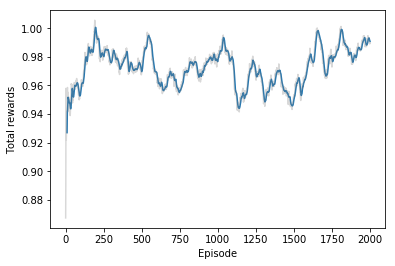

In [36]:
eps, arr = np.array(episode_rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0, 0.5, 'Total rewards')

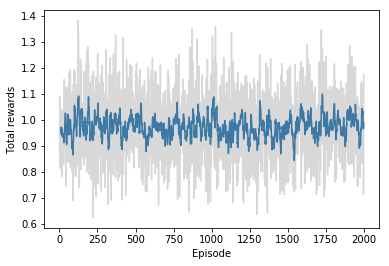

In [37]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0, 0.5, 'Average losses')

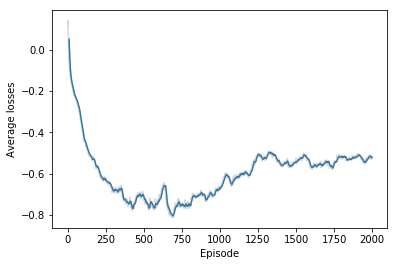

In [38]:
eps, arr = np.array(gloss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

Text(0, 0.5, 'Average losses')

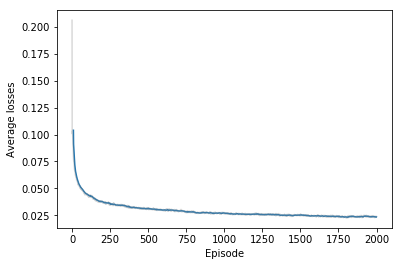

In [39]:
eps, arr = np.array(dloss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

In [ ]:
# env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
# states = env_info.vector_observations                  # get the current state (for each agent)
# scores = np.zeros(num_agents)                          # initialize the score (for each agent)

# while True:
#     actions = agent.act(states)                        # select actions from loaded model agent
#     env_info = env.step(actions)[brain_name]           # send all actions to tne environment
#     next_states = env_info.vector_observations         # get next state (for each agent)
#     rewards = env_info.rewards                         # get reward (for each agent)
#     dones = env_info.local_done                        # see if episode finished
#     scores += env_info.rewards                         # update the score (for each agent)
#     states = next_states                               # roll over states to next time step
#     if np.any(dones):                                  # exit loop if episode finished
#         break
# print('Total score: {}'.format(np.mean(scores)))